# 한글

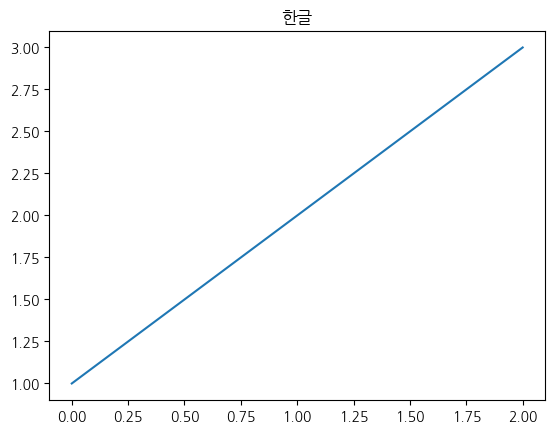

In [2]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 위아래 합 1퍼센트 제거 데이터프레임의 시작

## 데이터 다시 불러오기

In [3]:
ULS_df = pd.read_csv("data/울산_전처리_ver5.csv")
PUS_df = pd.read_csv("data/전처리ver1/부산_전처리ver1.csv")
INC_df = pd.read_csv("data/전처리ver1/인천_전처리ver1.csv")
KAN_df = pd.read_csv("data/전처리ver1/광양_전처리ver1.csv")

In [4]:
sorted_ULS_df = ULS_df.sort_values(by='대기율', ascending=True)
sorted_PUS_df = PUS_df.sort_values(by='대기율', ascending=True)
sorted_INC_df = INC_df.sort_values(by='대기율', ascending=True)
sorted_KAN_df = KAN_df.sort_values(by='대기율', ascending=True)
sorted_KAN_df.head(5)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,출항_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율
17221,광양,300KOREX,KOREX YEOSU,2022,11,최종,출항,"9,938",2022-11-20 17:30,2022-11-23 06:50,2022-12-26 09:18,기타,MBB,02,낙포석탄부두 2번선석,산물선(벌크선),1284.0,7.0,9.938,WAK,02,2정박지,2022-12-01 23:15:00,2022-12-02 06:30:00,접안대기,2022-12-26,허가완료,0 days 07:15:00,NaN,2022-11-23 06:50:00,2022-12-01 23:15:00,2022-12-01 23:15:00,-9 days +07:35:00,0,-9,0,7,435,-9,7,-12505,-0.034786
17218,광양,300KOREX,KOREX YEOSU,2022,11,최종,출항,"9,938",2022-11-20 17:30,2022-11-23 06:50,2022-12-26 09:18,기타,MBB,02,낙포석탄부두 2번선석,산물선(벌크선),1281.0,4.0,9.938,WAK,01,1정박지,2022-11-29 18:45:00,2022-11-29 20:44:00,접안대기,2022-12-26,허가완료,0 days 01:59:00,NaN,2022-11-23 06:50:00,2022-11-29 18:45:00,2022-11-29 18:45:00,-7 days +12:05:00,0,-7,0,1,119,-7,12,-9355,-0.012720
12267,광양,202823,20청우호,2022,38,최종,출항,299,2022-08-23 05:30,2022-08-23 07:30,2022-08-23 09:20,기타,MB4,05,제품부두 45선석,급유선,1237.0,1.0,299.000,MB4,05,제품부두 45선석,2022-08-23 05:30:00,2022-08-23 07:30:00,적하,2022-08-23,허가완료,0 days 00:00:00,NaN,2022-08-23 07:30:00,NaN,2022-08-23 05:30:00,0 days 02:00:00,0,0,0,0,0,0,2,120,0.000000
12266,광양,108674,동방글로리,2022,41,최종,출항,"3,812",2022-08-23 05:20,2022-08-24 16:40,2022-08-31 13:22,기타,MB3,01,RO-RO부두 31선석,철강재 운반선,1804.0,1.0,3.812,MB3,01,RO-RO부두 31선석,2022-08-23 05:20:00,2022-08-24 16:40:00,적하,2022-08-31,허가완료,0 days 00:00:00,NaN,2022-08-24 16:40:00,NaN,2022-08-23 05:20:00,1 days 11:20:00,0,1,0,0,0,1,11,2120,0.000000
12265,광양,DSQB2,강남스타,2022,6,최종,출항,266,2022-08-23 05:15,2022-08-23 20:30,2022-08-24 14:13,기타,MWO,01,율촌소형선부두,견인용예선,1345.0,1.0,2.246,MWO,01,율촌소형선부두,2022-08-23 05:15:00,2022-08-23 20:30:00,적하,2022-08-24,허가완료,0 days 00:00:00,NaN,2022-08-23 20:30:00,NaN,2022-08-23 05:15:00,0 days 15:15:00,0,0,0,0,0,0,15,915,0.000000


In [5]:
percentage_to_drop = int(len(sorted_ULS_df) * 0.005)
PER1_ULS = sorted_ULS_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_PUS_df) * 0.005)
PER1_PUS = sorted_PUS_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_INC_df) * 0.005)
PER1_INC = sorted_INC_df[percentage_to_drop:-percentage_to_drop]

percentage_to_drop = int(len(sorted_KAN_df) * 0.005)
PER1_KAN = sorted_KAN_df[percentage_to_drop:-percentage_to_drop]

# 선종별 / 컨테이너, 비 컨테이너선 시각화 시작

General Cargo Ship(A), Full-Containership(B), Oil Products Carrier(C), <br>
Bulk Carrier(D), Chemical Tanker(E), Passenger Ship(F),  <br>
Cement Carrier(G), Car Carrier(H), Refrigerator Carrier(I), <br>
LPG Carrier(J), Other Oil Carrier(K), Int’l Car-Ferry(L), <br>
Crude Oil Carrier(M), Coil-Dedicated Ship(N), Sand Carrier(O), <br>
Semi-Containership(P), Steel Product Carrier(Q), LNG Carrier(R), <br>
Cargo-Passenger Ship(S), Chemical Gas Carrier(T),  <br>
Hot Coil Carrier(U), Cruise Ship(V), Coal Carrier(W), Ore Carrier(X) <br>

[total : 24 types]

= > 다음의 분류과정의 필요

## 현재 우리 칼럼의 종류

In [6]:
PER1_ULS['선박용도'].value_counts()

선박용도
석유제품 운반선       82518
케미칼 운반선        21102
LPG 운반선         6282
일반화물선           4679
풀컨테이너선          4143
견인용예선           3950
기타 유조선          3741
급유선             2959
자동차운반선          2922
원유운반선           2695
산물선(벌크선)        2287
기타 예선           1944
케미칼가스 운반선        612
기타선              568
시멘트운반선           542
압항 예선            207
모래운반선            201
신조선              155
이.접안용 예선         125
철강재 운반선          117
폐기물 운반선           96
관공선               65
LNG 운반선           57
코일전용선             41
세미(혼재)컨테이너선       35
용달선               29
여객선               11
군함                 6
유람선                1
화객선                1
원양 어선              1
냉동.냉장선             1
수상레저기구             1
원목운반선              1
기타 부선              1
Name: count, dtype: int64

## 딕셔너리로 값을 치환

In [7]:
# 바꾸고 싶은 값들의 대응관계를 딕셔너리로 정의
change_dict = {'석유제품 운반선' : 'C',
               '케미칼 운반선' : 'E',
               'LPG 운반선' : 'J',
               '일반화물선' : 'A',
               '풀컨테이너선' : 'B',
               '기타 유조선' : 'K',
               '자동차운반선' : 'H',
               '원유운반선' : 'M',
               '산물선(벌크선)' : 'D',
               '급유선' : 'U',
               '시멘트운반선' : 'G',
               '케미칼가스 운반선' : 'T',
               '모래운반선' : 'O',
               '이.접안용 예선' : 'L',
               '철강재 운반선' : 'Q',
               'LNG 운반선' : 'R',
               '코일전용선' : 'N',
               '세미(혼재)컨테이너선' : 'P',
               '여객선' : 'F',
               '냉동.냉장선' : 'I',
               '유람선' : 'V',
               '원양 어선' : 'X',
               '석탄운반선' : 'W'
}

# '선박용도' 칼럼에서 값들을 대응하는 값으로 변경
PER1_ULS['선박용도'] = PER1_ULS['선박용도'].replace(change_dict)
PER1_ULS.head(3)

,항명,호출부호,선박명,입항횟수_연도,입항횟수_횟수,구분,입출,총톤수_x,입항일시,출항일시,수리일시,항해구분,계선장소_코드,계선장소_숫자,계선장소명,선박용도,순번,시설사용횟수,신고톤수,지정시설_코드,지정시설_번호,지정시설명,지정일시(FROM),지정일시(TO),사용목적명,예보일시,허가유무,접안_대기시간,Service_Time_End,Anchor,Service_Time_Start,Service_Time,접안_대기시간_NumDays,Service_Time_NumDays,접안_대기시간_일,접안_대기시간_시간,접안_대기시간_분,Service_Time_일,Service_Time_시간,Service_Time_분,대기율,재화중량톤수,"선박제원(총길이, m)","선박제원(너비, m)",만재흘수(m),깊이(m),길이1(m),선박국적(code),선박국적(이름),ETA_Year,ETA_Month,ETA_Day,ETA_Hour,ETA_Minute,일시,풍속(m/s),풍향(deg),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),수온(°C),최대파고(m),유의파고(m),평균파고(m),파주기(sec),파향(deg)
93006,울산,9V3674,MTM ST JEAN,2021.0,2.0,최종,출항,"20,035",2021-12-20 21:24:00,2021-12-26 12:50,2021-12-27 15:56,기타,MDG,1,정일1부두,C,3690.0,3.0,20.035,WAE,2.0,정박지-E2,2021-12-22 14:06:00,2021-12-23 08:20:00,기타,2021-12-27,허가완료,0 days 00:00:00,2021-12-26 12:50:00,NaN,2021-12-20 21:24:00,5 days 15:26:00,0,5,0,0,0,5,15,8126,0.0,"34,528",174.0,27.7,11.0,16.0,167.6,SG,싱가포르,2021,12,20,21,24,2021-12-20 21:00:00,8.3,265.0,10.6,1016.4,58.0,16.2,17.4,2.6,1.7,1.2,5.3,258.0
93005,울산,9V3674,MTM ST JEAN,2021.0,2.0,최종,출항,"20,035",2021-12-20 21:24:00,2021-12-26 12:50,2021-12-27 15:56,기타,MDG,1,정일1부두,C,3689.0,2.0,20.035,MB4,2.0,4부두 02,2021-12-21 11:18:00,2021-12-22 11:30:00,양하,2021-12-27,허가완료,0 days 00:00:00,2021-12-26 12:50:00,NaN,2021-12-20 21:24:00,5 days 15:26:00,0,5,0,0,0,5,15,8126,0.0,"34,528",174.0,27.7,11.0,16.0,167.6,SG,싱가포르,2021,12,20,21,24,2021-12-20 21:00:00,8.3,265.0,10.6,1016.4,58.0,16.2,17.4,2.6,1.7,1.2,5.3,258.0
93004,울산,9V3674,MTM ST JEAN,2021.0,2.0,최종,출항,"20,035",2021-12-20 21:24:00,2021-12-26 12:50,2021-12-27 15:56,기타,MDG,1,정일1부두,C,3688.0,1.0,20.035,WAE,2.0,정박지-E2,2021-12-20 21:24:00,2021-12-21 10:05:00,기타,2021-12-27,허가완료,0 days 00:00:00,2021-12-26 12:50:00,NaN,2021-12-20 21:24:00,5 days 15:26:00,0,5,0,0,0,5,15,8126,0.0,"34,528",174.0,27.7,11.0,16.0,167.6,SG,싱가포르,2021,12,20,21,24,2021-12-20 21:00:00,8.3,265.0,10.6,1016.4,58.0,16.2,17.4,2.6,1.7,1.2,5.3,258.0


## 잘 됐나 확인

In [8]:
# '선박용도' 칼럼 값이 주어진 리스트에 포함된 행만 추출
fil_concat = PER1_ULS[PER1_ULS['선박용도'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X'])]
# S = 화물 및 여객선인데 부존재함
fil_concat['선박용도'].value_counts()

선박용도
C    82518
E    21102
J     6282
A     4679
B     4143
K     3741
U     2959
H     2922
M     2695
D     2287
T      612
G      542
O      201
L      125
Q      117
R       57
N       41
P       35
F       11
V        1
X        1
I        1
Name: count, dtype: int64

## 선박 용도별 평균 대기율

In [9]:
average_by_ship_purpose = {}
for char in 'ABCDEFGHIJKLMNOPQRSTUVWX':
    average = fil_concat[fil_concat['선박용도'] == char]['대기율'].mean()
    average_by_ship_purpose[char] = average*100

In [10]:
average_by_ship_purpose

{'A': 17.16443324406382,
 'B': 0.7033683333094487,
 'C': 14.27586879400705,
 'D': 22.86970533358396,
 'E': 19.769123527537637,
 'F': 61.57331404515385,
 'G': 0.13794196627203922,
 'H': 1.3021146646363742,
 'I': 0.0,
 'J': 18.05028542831531,
 'K': 1.692588194604877,
 'L': 0.0,
 'M': 12.202109901652221,
 'N': 0.0,
 'O': 1.24578714627077,
 'P': 16.759894911662478,
 'Q': 2.0591271315908997,
 'R': 0.0,
 'S': nan,
 'T': 10.529897842220665,
 'U': 3.3785245646385875,
 'V': 0.0,
 'W': nan,
 'X': 0.0}

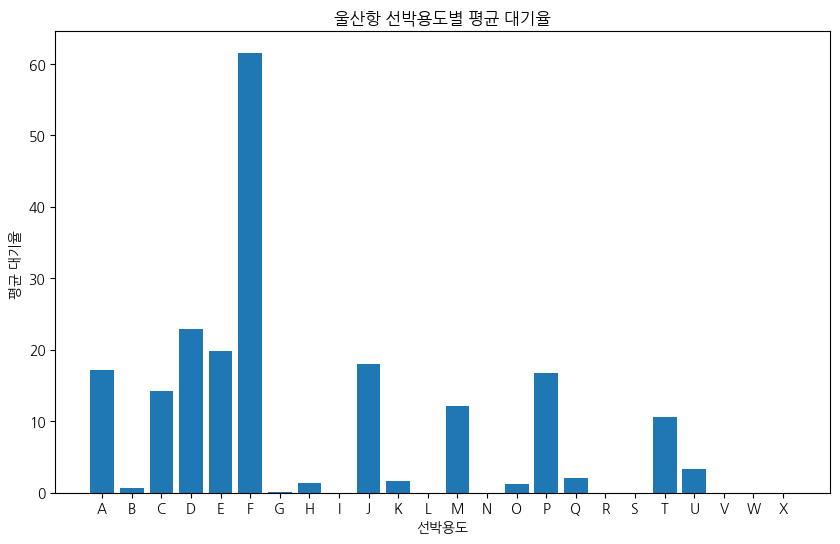

In [11]:
# 막대 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(average_by_ship_purpose.keys(), average_by_ship_purpose.values())

# 그래프 제목과 레이블 설정
ax.set_title('울산항 선박용도별 평균 대기율')
ax.set_xlabel('선박용도')
ax.set_ylabel('평균 대기율 ')

# 그래프 표시
plt.show()

## 컨테이너 / 비컨테이너

### 컨테이너

In [12]:
Cont = PER1_ULS[PER1_ULS['선박용도'].isin(['B', 'P'])]['대기율'].mean()*100

### 비컨테이너

In [13]:
Non_Cont= PER1_ULS[~PER1_ULS['선박용도'].isin(['B', 'P'])]['대기율'].mean()*100

### 둘의 차이 비교 그래프

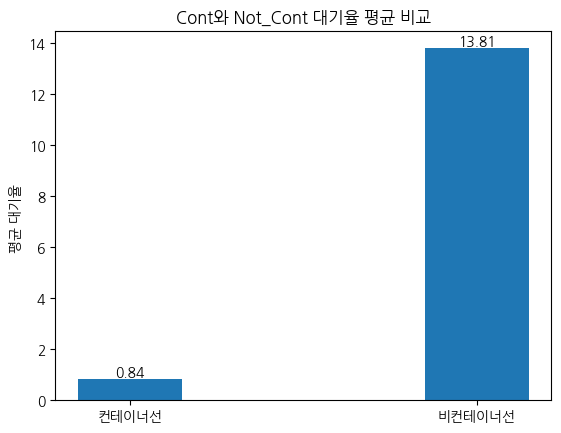

In [14]:
# 막대 그래프 생성
categories = ['컨테이너선', '비컨테이너선']
values = [Cont, Non_Cont]

fig, ax = plt.subplots()
bars = ax.bar(categories, values, width=0.3)  # width 조절

# 각 막대에 대한 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black', fontsize=10)

# 그래프 제목과 레이블 설정
ax.set_title('Cont와 Not_Cont 대기율 평균 비교')
ax.set_ylabel('평균 대기율 ')

# 그래프 표시
plt.show()


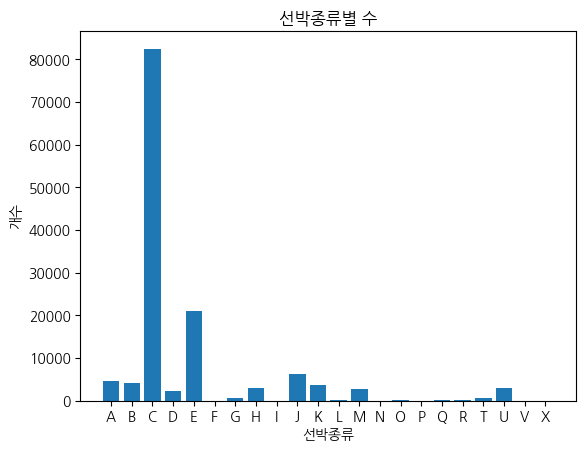

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 선박 개수 계산
alphabet_counts = fil_concat['선박용도'].value_counts().sort_index()

# 막대그래프 그리기
plt.bar(alphabet_counts.index, alphabet_counts.values)
plt.xlabel('선박종류')
plt.ylabel('개수')
plt.title('선박종류별 수')
plt.show()


In [16]:
# 울산 각 선박 종류별로 차지하는 비율

In [17]:
fil_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135072 entries, 93006 to 133300
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    135072 non-null  object 
 1   호출부호                  135072 non-null  object 
 2   선박명                   135072 non-null  object 
 3   입항횟수_연도               135072 non-null  float64
 4   입항횟수_횟수               135072 non-null  float64
 5   구분                    135072 non-null  object 
 6   입출                    135072 non-null  object 
 7   총톤수_x                 135072 non-null  object 
 8   입항일시                  135072 non-null  object 
 9   출항일시                  135072 non-null  object 
 10  수리일시                  135066 non-null  object 
 11  항해구분                  135072 non-null  object 
 12  계선장소_코드               135072 non-null  object 
 13  계선장소_숫자               135072 non-null  int64  
 14  계선장소명                 135072 non-null  object 
 15  선

In [18]:
data = {
    '선박종류': ['C', 'E', 'J', 'A', 'B', 'K', 'H', 'M', 'D', 'U', 'G', 'T', 'O', 'L', 'Q', 'R', 'N', 'P', 'F', 'I', 'V', 'X'],
    '비중': [29378/46545, 7019/46545, 1900/46545, 1528/46545, 1252/46545, 1209/46545, 1048/46545, 1036/46545, 828/46545, 725/46545, 197/46545, 179/46545, 82/46545, 69/46545, 40/46545, 18/46545, 14/46545, 14/46545, 6/46545, 1/46545, 1/46545, 1/46545]
}

T_df = pd.DataFrame(data)
T_df['비중']=T_df['비중']*100

In [19]:
T_df

,선박종류,비중
0,C,63.117413
1,E,15.080030
2,J,4.082071
3,A,3.282845
4,B,2.689870
5,K,2.597486
6,H,2.251584
7,M,2.225803
8,D,1.778924
9,U,1.557632
